Markdown cells in general will be above the code they are describing

All libraries used

The use of AI, specifically DeepSeek, was quite extensive, but only for finding out syntax, and finding functions that did what I required. No code was copied.

In [27]:
from matplotlib.ticker import LogLocator
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import numpy as np
import math 
import time


Algorithm 1, copied from the Assignment. 

constraints -> None
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         C, matrix with pxr dimensions

output -> None


In [28]:
def Algorithm_1(A,B,C,p,q,r):
    for i in range(p):
        for j in range(r):
            sum = 0
            for k in range(q):
                sum = sum +(A[i][k] * B[k][j])
            C[i][j] = sum
                

Algorithm 2, copied from the Assignment. Adapts Algorithm 1 by breaking into blocks of T = 5, which, from research i've discovered is helpful in speeding up the algorithm by minimizing amount of information in the cache(?) idk i didnt really understand. https://erikdemaine.org/papers/BRICS2002/paper.pdf

constraints -> None
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         C, matrix with pxr dimensions
         T, partition size

output -> None

In [29]:
def Algorithm_2(A,B,C,p,q,r,T=5):
    for i in range(0,p,T):
        for j in range(0, r, T):
            for k in range(0,q,T):
                for I in range(i, min(i+T,p)):
                    for J in range(j, min(j+T, r)):
                        sum = 0
                        for K in range(k, min(k+T, q)):
                            sum = sum + (A[I][K] * B[K][J])
                        C[I][J] = C[I][J] + sum
                
    

Algorithm 3, which uses recursion, splitting A and B in half while maintaining conditions needed for multiplication. 

constraints -> None
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         C, matrix with pxr dimensions

output -> None

In [30]:
def Algorithm_3(A,B,C,p,q,r):
    
    maximum_value = (max(p,max(q,r)))
    if maximum_value <= 8:
        Algorithm_1(A,B,C,p,q,r)
        
    else:
        if(maximum_value == p):
            if(p % 2 == 0):
                midpoint = A.shape[0] // 2
                second_half_length = midpoint
            else:
                midpoint = A.shape[0] // 2
                second_half_length = midpoint + 1
            
            top = (A[:midpoint, :]) 
            bottom = (A[A.shape[0] - second_half_length  :, :])


            
            temp_1 = np.zeros((top.shape[0],B.shape[1]), dtype = int)
            Algorithm_3(top,B,temp_1,midpoint,q,r)
            
            temp_2 = np.zeros((bottom.shape[0],B.shape[1]), dtype = int)
            Algorithm_3(bottom,B,temp_2,second_half_length,q,r)
            
            
            C[:] = np.vstack((temp_1, temp_2))
            
        elif(maximum_value == r):
            if(r % 2 == 0):
                midpoint = B.shape[1] // 2
                second_half_length = midpoint
            else:
                midpoint = B.shape[1] // 2
                second_half_length = midpoint + 1
                
            left = (B[ :, :midpoint])
            right = (B[:,B.shape[1] - second_half_length :])
            temp_1 = np.zeros((A.shape[0],left.shape[1]), dtype = int)
            Algorithm_3(A,left,temp_1,p,q,left.shape[1])
            temp_2 = np.zeros((A.shape[0],right.shape[1]), dtype = int)
            Algorithm_3(A,right,temp_2,p,q,right.shape[1])
            

            C[:] = np.hstack((temp_1, temp_2))
        else:
            if(q % 2 == 0):
                B_midpoint = B.shape[0] // 2
                B_second_half_length = B_midpoint
                A_midpoint = A.shape[1] // 2
                A_second_half_length = A_midpoint
            else:
                B_midpoint = B.shape[0] // 2
                B_second_half_length = B_midpoint + 1
                A_midpoint = A.shape[1] // 2
                A_second_half_length = A_midpoint + 1
                
            A_left = (A[:, :A_midpoint])
            A_right = (A[ :,A.shape[1] - A_second_half_length :])
            
            
            B_top = (B[ :B_midpoint, :])
            B_bottom = (B[B.shape[0] - B_second_half_length:, :])
            temp_1 = np.zeros((A_left.shape[0],B_top.shape[1]))
            temp_2 = np.zeros((A_right.shape[0],B_bottom.shape[1]))
            
            Algorithm_3(A_left,B_top,temp_1,A_left.shape[0],B_top.shape[0],B_top.shape[1])
            Algorithm_3(A_right,B_bottom,temp_2,A_right.shape[0],B_bottom.shape[0],B_bottom.shape[1])
            
            C[:] = np.add(temp_1, temp_2)
            
                
            
            

Algorithm 4, which uses recursion to split the matricies into 4x4 blocks. 

constraints -> p = q = r = 2^i, where i∈N 
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         C, matrix with pxr dimensions

output -> None

In [31]:
def Algorithm_4(A,B,C):
    
    if A.shape[1] > 8:
        shape = A.shape[0]//2
        
        A_q1 = (A[:shape,shape:])
        A_q2 = (A[:shape,:shape])
        A_q3 = (A[shape:,:shape])
        A_q4 = (A[shape:,shape:])
    
        B_q1 = (B[:shape,shape:])
        B_q2 = (B[:shape,:shape])
        B_q3 = (B[shape:,:shape])
        B_q4 = (B[shape:,shape:])

        C_q1 = np.zeros((shape,shape), dtype = int)
        C_q2 = np.zeros((shape,shape), dtype = int)
        C_q3 = np.zeros((shape,shape), dtype = int)
        C_q4 = np.zeros((shape,shape), dtype = int)
    
        temp_1 = np.zeros((shape,shape), dtype = int)
        temp_2 = np.zeros((shape,shape), dtype = int)

        Algorithm_4(A_q2,B_q1,temp_1)
        Algorithm_4(A_q1,B_q4,temp_2)
        C_q1 = np.add(temp_1,temp_2)
        
        Algorithm_4(A_q2,B_q2,temp_1)
        Algorithm_4(A_q1,B_q3,temp_2)
        C_q2 = np.add(temp_1,temp_2)

        Algorithm_4(A_q3,B_q2,temp_1)
        Algorithm_4(A_q4,B_q3,temp_2)
        C_q3 = np.add(temp_1,temp_2)

        Algorithm_4(A_q3,B_q1,temp_1)
        Algorithm_4(A_q4,B_q4,temp_2)
        C_q4 = np.add(temp_1,temp_2)
        
        
        
        C_left = np.vstack((C_q2,C_q3))
        C_right = np.vstack((C_q1, C_q4))
        
        C[:] = np.array(np.hstack((C_left, C_right)))
    else:
        Algorithm_1(A, B, C, A.shape[0],A.shape[0],A.shape[0])
        
    

Algorithm 5, or Strassen's algorithm. Uses recursion to breack matricies itno squares, then rebuilds them using 7 multiplications instead of 8. Very good for time.

constraints -> p = q = r = 2^i, where i∈N 
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         C, matrix with pxr dimensions

output -> None

In [32]:
def  Algorithm_5(A,B,C):
    if(A.shape[0] < 9):
        Algorithm_1(A, B, C, A.shape[0],A.shape[0],A.shape[0])
    else:
        a0, a1 = A.shape
        b0, b1 = B.shape
    
        a0 = a0 //2
        a1 = a1 //2
        b0 = b0 //2
        b1 = b1 //2
    
        A_q1 = (A[:a0,a1:])
        A_q3 = (A[a0:,:a1])
        A_q4 = (A[a0:,a1:])
        A_q2 = (A[:a0,:a1])
        
        B_q1 = (B[:b0,b1:])
        B_q3 = (B[b0:,:b1])
        B_q4 = (B[b0:,b1:])
        B_q2 = (B[:b0,:b1])
        
        
        m1 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q2 + A_q4,B_q2 + B_q4, m1)
    
        m2 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q3 + A_q4, B_q2, m2)
        
        m3 = np.zeros((a0,b1), dtype = int)
        Algorithm_5( A_q2, B_q1 - B_q4, m3)
        
        m4 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q4, B_q3 - B_q2, m4)
        
        m5 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q2 + A_q1, B_q4, m5)
        
        m6 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q3 - A_q2,B_q2 + B_q1, m6)
        
        m7 = np.zeros((a0,b1), dtype = int)
        Algorithm_5(A_q1 - A_q4 , B_q3 + B_q4, m7)
    
        C_q1 = m3 + m5
        C_q2 = m1 + m4 - m5 + m7
        C_q3 = m2 + m4
        C_q4 = m1 - m2 +m3 + m6
    
    
        C_left = np.vstack((C_q2,C_q3))
        C_right = np.vstack((C_q1, C_q4))
            
        C[:] = np.array(np.hstack((C_left, C_right)))
        

Records time for Algorithm 1

constraints -> executions >= 1
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         executions, how many to test (helps improve accuracy of data)

output -> Average time taken

In [33]:
def Algorithm_1_test(A ,B, executions):
    temp = np.zeros((A.shape[0], B.shape[1]))
    
    
    total_time = 0
    for i in range(executions):
        start = time.perf_counter()
        Algorithm_1(A,B,temp,A.shape[0],B.shape[0],B.shape[1])
        end = time.perf_counter()
        total_time = total_time + (end - start)

    
    return total_time / executions

Records time for Algorithm 2

constraints -> executions >= 1
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         executions, how many to test (helps improve accuracy of data)

output -> Average time taken

In [34]:
def Algorithm_2_test(A, B, executions):
    temp = np.zeros((A.shape[0], B.shape[1]))
    
    
    total_time = 0
    for i in range(executions):
        start = time.perf_counter()
        Algorithm_2(A,B,temp,A.shape[0],B.shape[0],B.shape[1])
        end = time.perf_counter()
        total_time = total_time + (end - start)

        
    return total_time / executions

Records time for Algorithm 3

constraints -> executions >= 1
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         executions, how many to test (helps improve accuracy of data)

output -> Average time taken

In [35]:
def Algorithm_3_test(A,B, executions):
    temp = np.zeros((A.shape[0], B.shape[1]))
    shape = temp.shape[0]
    
    total_time = 0
    for i in range(executions):
        start = time.perf_counter()
        Algorithm_3(A,B,temp,shape,shape,shape)
        end = time.perf_counter()
        total_time = total_time + (end - start)

    

        
    return total_time / executions

Records time for Algorithm 4

constraints -> executions >= 1
               p = q = r = 2^i, where i∈N 
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         executions, how many to test (helps improve accuracy of data)

output -> Average time taken

In [36]:
def Algorithm_4_test(A,B, executions):
    temp = np.zeros((A.shape[0], B.shape[1]))
    
    
    total_time = 0
    for i in range(executions):
        start = time.perf_counter()
        Algorithm_4(A,B,temp)
        end = time.perf_counter()
        total_time = total_time + (end - start)

        
    return total_time / executions

Records time for Algorithm 5

constraints -> executions >= 1
               p = q = r = 2^i, where i∈N 
input -> A, matrix with pxq dimensions
         B, matrix with qxr dimensions
         executions, how many to test (helps improve accuracy of data)

output -> Average time taken

In [37]:
def Algorithm_5_test(A,B, executions):
    temp = np.zeros((A.shape[0], B.shape[1]))
    
    
    total_time = 0
    for i in range(executions):
        start = time.perf_counter()
        Algorithm_5(A,B,temp)
        end = time.perf_counter()
        total_time = total_time + (end - start)

        
    return total_time / executions

First block of code, reads input and uses all the algorithms. Prints out results as requred of the project

constraints -> None
input -> txt file

output -> results of the 4x4 matrices being solved by each algorithm

In [38]:
file = open("input.txt", "r")
contents = file.read()

half = contents.find(";")
Temp_1 = contents[1 : half]
Temp_2 = contents[half + 1 : len(contents) - 1]

a1 = Temp_1.split(",")
a2 = Temp_2.split(",")

numbers_1 = [int (num) for num in a1]
numbers_2 = [int (num) for num in a2]

matrix_1 = np.array(numbers_1).reshape(4, 4)
matrix_2 = np.array(numbers_2).reshape(4, 4)

product_1 = np.zeros((4,4), dtype = int)

Algorithm_1(matrix_1, matrix_2, product_1, 4, 4, 4)
#print(f"Algorithm-1: \n{product}")

product_2 = np.zeros((4,4), dtype = int)

Algorithm_2(matrix_1, matrix_2, product_2, 4, 4, 4)
#print(f"Algorithm-2: \n{product_2}")

product_3 = np.zeros((4,4), dtype = int)

Algorithm_3(matrix_1, matrix_2, product_3, 4, 4, 4)
#print(f"Algorithm-3: \n{product_3}")      

product_4 = np.zeros((4,4), dtype = int)

Algorithm_4(matrix_1,matrix_2,product_4)
#print(f"Algorithm-4: \n{product_4}")      

product_5 = np.zeros((4,4), dtype = int)
Algorithm_5(matrix_1, matrix_2, product_5)
##print(f"Algorithm-5: \n{product_5}") 

for i in range(5):
    print(f"Algorithm-{i + 1}:      ", end=' ')
print("")


for i in range(4):
    for j, product in enumerate([product_1, product_2, product_3, product_4, product_5], 1):
        print(f"{str(product[i])}     ", end=' ')
    print("")

Algorithm-1:       Algorithm-2:       Algorithm-3:       Algorithm-4:       Algorithm-5:       
[18 15  7 14]      [18 15  7 14]      [18 15  7 14]      [18 15  7 14]      [18 15  7 14]      
[13 16 14  7]      [13 16 14  7]      [13 16 14  7]      [13 16 14  7]      [13 16 14  7]      
[ 4 13 17 16]      [ 4 13 17 16]      [ 4 13 17 16]      [ 4 13 17 16]      [ 4 13 17 16]      
[10 20 25 25]      [10 20 25 25]      [10 20 25 25]      [10 20 25 25]      [10 20 25 25]      


Experiment 1. Generate 30 pairs of matrices, with size increasing by ten, containing values randomly selected from 0 to 1. Then go through Algorithm 1 - 3, testing time. 

constraints -> None
input -> None

output -> csv file called 'Matric_data_1.csv', which stores empirical times found

I did this because it was taking upwards of an hour, and wanted to have data to test with

In [50]:
#experiment 1
    
n = []
first_matrix = []
second_matrix = []
for i in range(10, 301, 10):
    n.append(i)
    matrix_1 = np.random.rand(i, i).flatten().tolist()
    matrix_2 = np.random.rand(i, i).flatten().tolist()
    first_matrix.append(matrix_1)
    second_matrix.append(matrix_2)
        
    
matrices_data_1 = pd.DataFrame(n, columns = ['n'])
matrices_data_1['First Matrix'] = first_matrix 
matrices_data_1['Second Matrix'] = second_matrix 


Algorithm_1_seconds = []
Algorithm_2_seconds = []
Algorithm_3_seconds = []
executions = 4
for i in range(30):
    n = matrices_data_1.loc[i,'n']
    Algorithm_1_seconds.append(Algorithm_1_test(np.array(matrices_data_1.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_1.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_1['Algorithm 1 in seconds'] = Algorithm_1_seconds

for i in range(30):
    n = matrices_data_1.loc[i,'n']
    Algorithm_2_seconds.append(Algorithm_2_test(np.array(matrices_data_1.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_1.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_1['Algorithm 2 in seconds'] = Algorithm_2_seconds

for i in range(30):
    n = matrices_data_1.loc[i,'n']
    Algorithm_3_seconds.append(Algorithm_3_test(np.array(matrices_data_1.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_1.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_1['Algorithm 3 in seconds'] = Algorithm_3_seconds
        
temp = matrices_data_1.iloc[:, 3:6]
temp.to_csv('Matrix data_1.csv', index = False)
    

Formula for Algorithm 1. 

constraints -> either start or finish are 10
input -> start, start value for the loop
         finish, where to stop
         step, how much each increment is
simulates the dimensions of the matrices
         

output -> estimated time based on the formula within the loop

In [7]:
def Generate_Alg_1_estimated_time(start, finish, step):
    Algorithm_1_estimate = []
    if (start == 10):
        for n in range(start,finish,step):
            Algorithm_1_estimate.append((6*(n ** 3) + 5*(n**2) + 2*n + 1)/5000000)
    elif(finish == 10):
        for i in range(start,finish,step):
            n = 2 ** i
            Algorithm_1_estimate.append((6*(n ** 3) + 5*(n**2) + 2*n + 1)/5000000)
    
    return Algorithm_1_estimate

Formula for Algorithm 2. 

constraints -> either start or finish are 10
input -> start, start value for the loop
         finish, where to stop
         step, how much each increment is
simulates the dimensions of the matrices
         

output -> estimated time based on the formula within the loop

In [8]:
def Generate_Alg_2_estimated_time(start, finish, step):
    Algorithm_2_estimate = []
    T = 5
    for n in range(start,finish,step):
        temp_1 = n//T
        Algorithm_2_estimate.append( ( 
            (2 * (temp_1 ** 2)) + 
            (2 * temp_1) + 
            (temp_1 ** 3) * ( (6 * (T ** 3)) + (5 * (T ** 2)) + (2 * T) + 2) ) 
                                    /5000000)
    
    return Algorithm_2_estimate

Formula for Algorithm 3. 

constraints -> either start or finish are 10
input -> start, start value for the loop
         finish, where to stop
         step, how much each increment is
simulates the dimensions of the matrices
         

output -> estimated time based on the formula within the loop

In [12]:
def Generate_Alg_3_estimated_time(start, finish, step):
    Algorithm_3_estimate = []
    if(start == 10):
        #-1.479+0.0644x-0.0005888x^{2}+0.000003207x^{3} - polynomial regresion from r
        for n in range(start,finish, step):
            i = n 
            time = 0
            exponent = 0
            while (i > 8):
                time += (8 ** exponent )* (12*( i ** 2) + 96)
                i = i//8
                exponent += 1
            #exponent variable is the number of times n was divided by 8 (plus 1), or 1/3 of the times n was divided by 2
            exponent -= 1
            base_case_occurances = 3 * exponent
            time += (base_case_occurances) * 3418
            Algorithm_3_estimate.append(time/1000000)
    else:
        for j in range(start,finish, step):
            n = 2 ** j
            time = 0
            exponent = 0
            while (n > 8):
                time += (8 ** exponent )* (12*( n ** 2) + 96)
                n = n//8
                exponent += 1
            #exponent variable is the number of times n was divided by 8 (plus 1), or 1/3 of the times n was divided by 2
            exponent -= 1
            base_case_occurances = 3 * exponent
            time += (base_case_occurances) * 3418
            Algorithm_3_estimate.append(time/1000000)
        
    
    
    return Algorithm_3_estimate

Formula for Algorithm 4. 

constraints -> None
input -> None

output -> estimated time based on the formula within the loop

In [18]:
def Generate_Alg_4_estimated_time():
    Algorithm_4_estimate = []
    for j in range(0,10):
            n = 2 ** j
            time = 0
            exponent = 0
            while (n > 8):
                time += (14 * (n ** 2) * (2 ** exponent)) + (88 * (8 ** exponent))
                n = n//2
                exponent += 1
            #exponent variable is the number of times n was divided by 8 (plus 1), or 1/3 of the times n was divided by 2
            exponent -= 1
            base_case_occurances =  ((n ** 3)/512) 
            time += (base_case_occurances) * 3418
            Algorithm_4_estimate.append(time/1000000)
    
    return Algorithm_4_estimate

Formula for Algorithm 5.

constraints -> None 
input -> None

output -> estimated time based on the formula within the loop

In [19]:
def Generate_Alg_5_estimated_time():
    Algorithm_5_estimate = []
    for j in range(0,10):
            n = 2 ** j
            time = 0
            exponent = 0
            while (n > 8):
                time += (21 * (n ** 2) * ((7/4) ** exponent) + 30 *(7 ** exponent))
                n = n//2
                exponent += 1
            #exponent variable is the number of times n was divided by 8 (plus 1), or 1/3 of the times n was divided by 2
            exponent -= 1
            base_case_occurances =  ((n ** 2.8)/343) 
            time += (base_case_occurances) * 3418
            Algorithm_5_estimate.append(time/1000000)
    
    return Algorithm_5_estimate

Calls all prediction formulas for experiment 1. Then adds them to the dataframe and graphs.

constraints -> Draws data for emirical times from a csv file
input -> csv file containing empirical times

output -> display of data requred by Assignment, then the graphs data

,Algorithm 1 in seconds,Algorithm 2 in seconds,Algorithm 3 in seconds,Algorithm 1 estimate,Algorithm 2 estimate,Algorithm 3 estimate
0,0.001717,0.001716,0.001176,0.001304,0.001422,0.001296
1,0.012075,0.014397,0.017390,0.010008,0.011362,0.004896
2,0.040998,0.048079,0.042574,0.033312,0.038335,0.010896
3,0.092709,0.116538,0.119508,0.078416,0.090858,0.019296
4,0.157114,0.221687,0.215452,0.152520,0.177444,0.030096
5,0.286870,0.397831,0.346757,0.262824,0.306610,0.043296
6,0.472330,0.617169,0.657163,0.416528,0.486870,0.058896
7,0.698347,0.915932,0.982507,0.620832,0.726739,0.097518
8,1.023188,1.300317,1.309713,0.882936,1.034734,0.119934
9,1.440522,1.800165,1.764939,1.210040,1.419368,0.144942


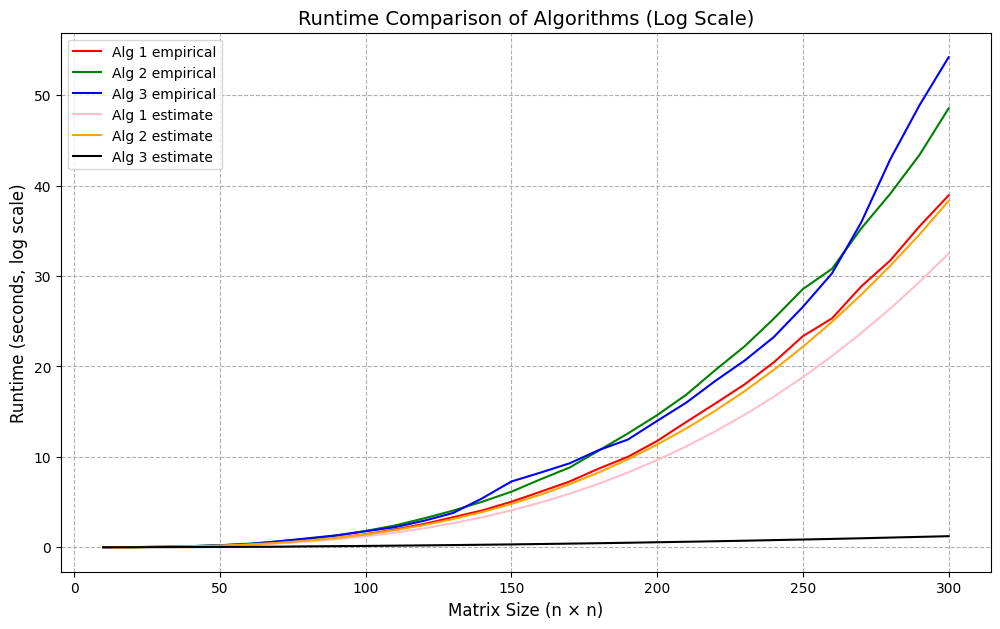

In [14]:
matrices_data = pd.read_csv('Matrix data_1.csv')

Algorithm_1_estimate = Generate_Alg_1_estimated_time(10,301,10)
matrices_data['Algorithm 1 estimate'] = Algorithm_1_estimate

Algorithm_2_estimate = Generate_Alg_2_estimated_time(10,301,10)
matrices_data['Algorithm 2 estimate'] = Algorithm_2_estimate

Algorithm_3_estimate = Generate_Alg_3_estimated_time(10,301,10)
matrices_data['Algorithm 3 estimate'] = Algorithm_3_estimate

display(matrices_data)
plt.figure(figsize = (12,7))

plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 1 in seconds'], label = 'Alg 1 empirical', color = 'red')
plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 2 in seconds'], label = 'Alg 2 empirical', color = 'green')
plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 3 in seconds'], label = 'Alg 3 empirical', color = 'blue')
plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 1 estimate'], label = 'Alg 1 estimate', color = 'pink')
plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 2 estimate'], label = 'Alg 2 estimate', color = 'orange')    
plt.plot((matrices_data.index + 1)*10,matrices_data['Algorithm 3 estimate'], label = 'Alg 3 estimate', color = 'black')    


plt.xlabel("Matrix Size (n × n)", fontsize=12)
plt.ylabel("Runtime (seconds, log scale)", fontsize=12)
plt.title("Runtime Comparison of Algorithms (Log Scale)", fontsize=14)
plt.grid(True, which="both", linestyle='--')  
plt.legend()
plt.show()

    

Experiment 2. Genrate 1x1 -> 512x512 matrix pairs, then solve them with algorithms 1,3,4,5. 

constraints -> None
input -> None

output -> csv file called 'Matric_data_2.csv', which stores empirical times found

In [56]:
#experiment 2

n = []
first_matrix = []
second_matrix = []
for i in range(0, 10):
    n.append(2 ** i)
    matrix_1 = np.random.rand(2 ** i ,2 ** i).flatten().tolist()
    matrix_2 = np.random.rand(2 ** i,2 ** i).flatten().tolist()
    first_matrix.append(matrix_1)
    second_matrix.append(matrix_2)

matrices_data_2 = pd.DataFrame(n, columns = ['n'])
matrices_data_2['First Matrix'] = first_matrix 
matrices_data_2['Second Matrix'] = second_matrix 


Algorithm_1_seconds = []
Algorithm_3_seconds = []
Algorithm_4_seconds = []
Algorithm_5_seconds = []
Algorithm_5_recursive_seconds = []


executions = 10
for i in range(0, 10):
    n = matrices_data_2.loc[i,'n']
    Algorithm_1_seconds.append(Algorithm_1_test(np.array(matrices_data_2.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_2.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_2['Algorithm 1 in seconds'] = Algorithm_1_seconds

for i in range(0, 10):
    n = matrices_data_2.loc[i,'n']
    Algorithm_3_seconds.append(Algorithm_3_test(np.array(matrices_data_2.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_2.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_2['Algorithm 3 in seconds'] = Algorithm_3_seconds
for i in range(0, 10):
    n = matrices_data_2.loc[i,'n']
    Algorithm_4_seconds.append(Algorithm_4_test(np.array(matrices_data_2.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_2.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_2['Algorithm 4 in seconds'] = Algorithm_4_seconds

for i in range(0, 10):
    n = matrices_data_2.loc[i,'n']
    Algorithm_5_seconds.append(Algorithm_5_test(np.array(matrices_data_2.loc[i,'First Matrix']).reshape(n,n),
                                                     np.array(matrices_data_2.loc[i,'Second Matrix']).reshape(n,n),
                                                     executions))
matrices_data_2['Algorithm 5 in seconds'] = Algorithm_5_seconds

temp = matrices_data_2.iloc[:, 3:7]
temp.to_csv('Matrix data_2.csv', index = False)

Calls all prediction formulas for experiment 2. Then adds them to the dataframe and graphs.

constraints -> Draws data for emirical times from a csv file
input -> csv file containing empirical times

output -> display of data requred by Assignment, then the graphs data

,Algorithm 1 in seconds,Algorithm 3 in seconds,Algorithm 4 in seconds,Algorithm 5 in seconds,Algorithm 1 estimate,Algorithm 3 estimate,Algorithm 4 estimate,Algorithm 5 estimate
0,0.000006,0.000006,0.000009,0.000004,0.000003,-0.010254,0.000007,0.000010
1,0.000018,0.000022,0.000021,0.000015,0.000015,-0.010254,0.000053,0.000069
2,0.000105,0.000095,0.000102,0.000226,0.000095,-0.010254,0.000427,0.000483
3,0.000798,0.000829,0.000878,0.000788,0.000682,-0.010254,0.003418,0.003366
4,0.006167,0.006557,0.006915,0.005658,0.005178,0.003168,0.007090,0.008772
5,0.048713,0.054419,0.052427,0.040954,0.040359,0.012384,0.025714,0.034518
6,0.360744,0.414437,0.426242,0.288261,0.318695,0.049248,0.110194,0.145188
7,2.986400,3.366101,3.292598,1.982960,2.533018,0.232302,0.484978,0.604626
8,23.502912,27.349465,26.663158,14.204238,20.198298,0.895854,2.193010,2.494857
9,187.989391,216.436893,213.249769,99.175061,161.323623,3.550062,10.524274,10.309687


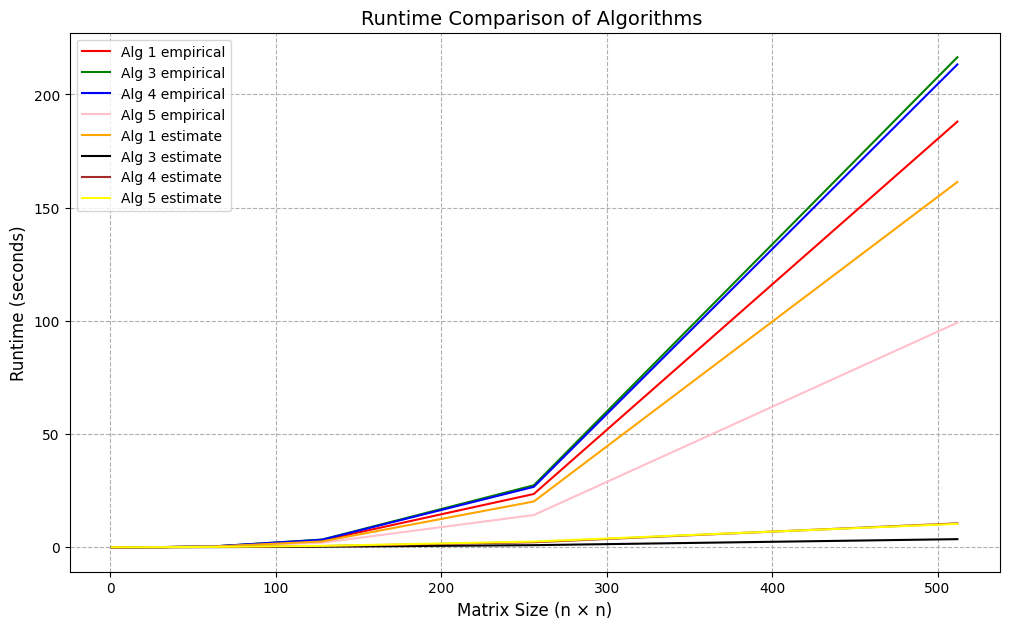

In [45]:
matrices_data = pd.read_csv('Matrix data_2.csv')

Algorithm_1_estimate = Generate_Alg_1_estimated_time(0,10,1)
matrices_data['Algorithm 1 estimate'] = Algorithm_1_estimate

Algorithm_3_estimate = Generate_Alg_3_estimated_time(0,10,1)
matrices_data['Algorithm 3 estimate'] = Algorithm_3_estimate

Algorithm_4_estimate = Generate_Alg_4_estimated_time()
matrices_data['Algorithm 4 estimate'] = Algorithm_4_estimate

Algorithm_5_estimate = Generate_Alg_5_estimated_time()
matrices_data['Algorithm 5 estimate'] = Algorithm_5_estimate

display(matrices_data)
plt.figure(figsize = (12,7))

plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 1 in seconds'], label = 'Alg 1 empirical', color = 'red')
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 3 in seconds'], label = 'Alg 3 empirical', color = 'green')
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 4 in seconds'], label = 'Alg 4 empirical', color = 'blue')
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 5 in seconds'], label = 'Alg 5 empirical', color = 'pink')
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 1 estimate'], label = 'Alg 1 estimate', color = 'orange')    
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 3 estimate'], label = 'Alg 3 estimate', color = 'black')    
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 4 estimate'], label = 'Alg 4 estimate', color = 'brown') 
plt.plot(2 ** (matrices_data.index),matrices_data['Algorithm 5 estimate'], label = 'Alg 5 estimate', color = 'yellow')    





plt.xlabel("Matrix Size (n × n)", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.title("Runtime Comparison of Algorithms ", fontsize=14)
plt.grid(True, which="both", linestyle='--')  
plt.legend()
plt.show()


MATRIX_CHAIN_ORDER algorithm. Uses p array to find the best solution path for an n length chain of matrices. This works by iterating through p, finding lowest cost multilpication orders, then returning observed solution.


constraints -> None
input -> p, array of dimention sizes
         n, length of matrix chain

output -> matrices M, and S. M contains optimal soultion values, S contains optimal soulution split locations

In [46]:
def MATRIX_CHAIN_ORDER(p,n):
    M = np.array(np.zeros((n,n), dtype = int))
    S = np.array(np.zeros((n,n), dtype = int))
    for i in range(n):
        M[i][i] = 0
    for l in range(2,n + 1):
        for i in range(0,n - l + 1):
            j = i + l - 1
            M[i][j] = 0
            for k in range(i, j):
                q = M[i][k] + M[k + 1][j] + (p[i] * p[k+1] * p[j+1])
                if(q < M[i][j] or M[i][j] == 0):
                    M[i][j] = q
                    S[i][j] = k
    return (S, M)
            



Generate_matries. Get values for the matrices, so that they can be tested.

constraints -> None
input -> p, array of dimention sizes
         n, length of matrix chain

output -> matrices A0 - An, generated randomly

In [47]:
def generate_Matrices(p,n):
    matrices = []
    for i in range(n + 1):
        matrices.append( np.random.rand(p[i] ,p[i+1]))
    return matrices

CHAIN_UNOPTIMIZED_TIME. Algorithm which multiplies each matrix in left to right order. 

constraints -> None
input -> A, generated matrices to be multiplied

output -> None

In [48]:
def CHAIN_UNOPTIMIZED_TIME(A):
    
    product = np.array(np.zeros((len(A[0]),len(A[1][0])), dtype = int))
    #print(f"A0 shape {A[0].shape}, A1 shape {A[1].shape}")
    Algorithm_1(A[0],A[1], product, len(A[0]),len(A[1]),len(A[1][0]))
    #print(product.shape)
    for i in range(2, len(A)):
        temp = np.array(np.zeros((product.shape[0],len(A[i][0]))))
        #print(f" A{i} shape  {A[i].shape}  temp shape  {temp.shape} ")
        Algorithm_1(product,A[i],temp, product.shape[0],product.shape[1],len(A[i][0]))
        product = temp

CHAIN_OPTIMIZED_TIME. Recursive algorithm that uses the S matrix to efficeintly multiply the matrices

constraints -> None
input -> S, Matrix containing k, spilt location
         A, generated matrices to be multiplied
         i, left index
         j, right index

output -> None

In [49]:
def CHAIN_OPTIMIZED_TIME(S,A, i, j):
    if(i == j):
        return A[i]
    else:
        k = S[i][j]
        temp_1 = CHAIN_OPTIMIZED_TIME(S,A, i, k)
        temp_2 = CHAIN_OPTIMIZED_TIME(S,A, k+1, j)
        final = np.zeros((temp_1.shape[0], temp_2.shape[1]))
        Algorithm_1(temp_1,temp_2,final,temp_1.shape[0],temp_1.shape[1],temp_2.shape[1])
        return final

Experiment 3. Generate matrix chains with random dimensions from 10 to j * 10. Create dataframe which contains values for each matrix, including M matrix, S matrix, upper bounds, and optimized and unoptimized times.

constraints -> None
input -> None

output -> csv file called CHAIN_MULT_DATA.csv which stores values required by the assignment

In [50]:
#experiment 3


#generate 19 matrix chains of length 10
#loop from 2 to 20 for j


j = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
 
final_data = pd.DataFrame()
chain_matrix_data = pd.DataFrame(j, columns = ['j'])
chain_matrix_data['upper bound'] = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
chain_matrix_data['p'] = chain_matrix_data['j'].apply(
    lambda x: np.random.randint(10, x*10, size=11).tolist()
)
n = 9

chain_matrix_data['S'] = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

chain_matrix_data['M'] = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]


for index in chain_matrix_data.index:
    S, M = MATRIX_CHAIN_ORDER(chain_matrix_data.at[index, 'p'],n )
    chain_matrix_data.at[index,'S'] = S.tolist()
    chain_matrix_data.at[index,'M'] = M.tolist()


unoptimized = []
optimized = []

for index in chain_matrix_data.index:
    A = generate_Matrices(chain_matrix_data.at[index, 'p'], n)
    
    
    start = time.perf_counter()
    CHAIN_UNOPTIMIZED_TIME(A)
    end = time.perf_counter()
    total_time_1 = (end - start) 
    
    unoptimized.append(total_time_1)


    start = time.perf_counter()
    CHAIN_OPTIMIZED_TIME(chain_matrix_data.at[index, 'S'],A, 0, n-1)
    end = time.perf_counter()
    total_time_2 = (end - start) 
    optimized.append(total_time_2)
    #print(f"Time unoptimized {total_time_1}  v.s.  Time optimized {total_time_2} \n {total_time_1 - total_time_2 } sec decrease", end = "\n\n\n")

    
chain_matrix_data['Unoptimized time'] = unoptimized
chain_matrix_data['Optimized time'] = optimized



final_data[['j','Upper Bound', 'Unoptimized time','Optimized time']] = chain_matrix_data[['j','upper bound', 'Unoptimized time', 'Optimized time']]
final_data.to_csv('CHAIN_MULT_DATA.csv', index = False)

Data frame and graph for experiment 3

constraints -> Draws data for emirical times from a csv file
input -> csv file containing empirical times

output -> display of data requred by Assignment, then the graphs data

,j,Upper Bound,Unoptimized time,Optimized time
0,2,20,0.009500,0.005232
1,3,30,0.049584,0.036538
2,4,40,0.205739,0.067778
3,5,50,0.209964,0.163581
4,6,60,0.846106,0.417182
5,7,70,1.182613,0.305149
6,8,80,0.379586,0.282057
7,9,90,0.600848,0.488618
8,10,100,1.562316,0.434658
9,11,110,3.042739,1.104854


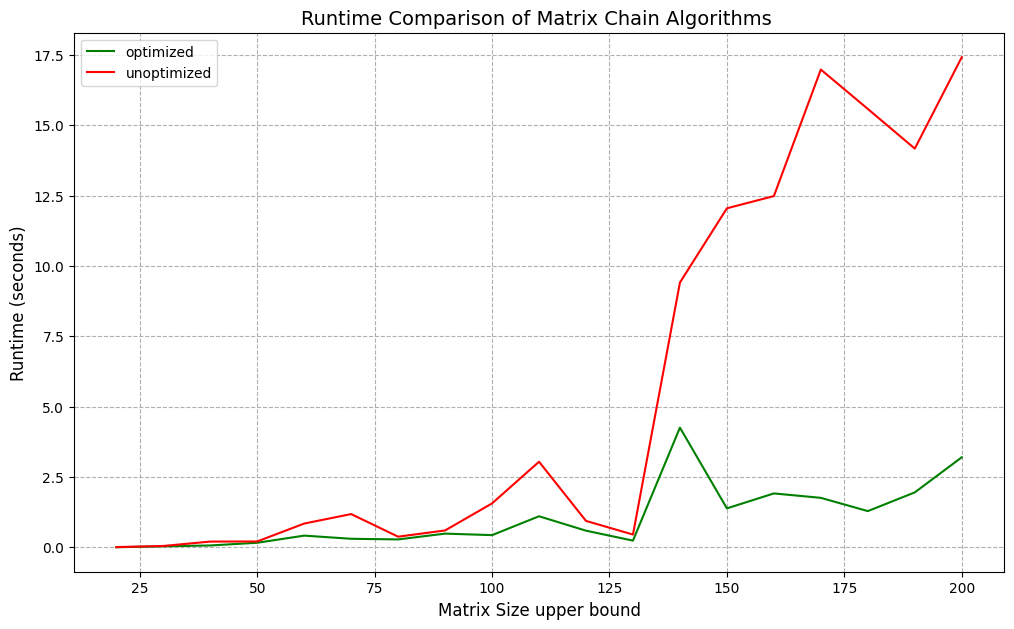

In [51]:
chain_matrix_data = pd.read_csv('CHAIN_MULT_DATA.csv')

display(chain_matrix_data)
plt.figure(figsize = (12,7))


plt.plot(chain_matrix_data['Upper Bound'],chain_matrix_data['Optimized time'], label = 'optimized', color = 'green')
plt.plot(chain_matrix_data['Upper Bound'],chain_matrix_data['Unoptimized time'], label = 'unoptimized', color = 'red')


plt.xlabel("Matrix Size upper bound", fontsize=12)
plt.ylabel("Runtime (seconds)", fontsize=12)
plt.title("Runtime Comparison of Matrix Chain Algorithms ", fontsize=14)
plt.grid(True, which="both", linestyle='--')  
plt.legend()
plt.show()


